In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("customer_churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.shape


(7043, 21)

In [5]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
c_5=data.iloc[:, 4]
c_5.head()

0    No
1    No
2    No
3    No
4    No
Name: Dependents, dtype: object

In [7]:
c_15=data.iloc[:, 14]
c_15.head()

0    No
1    No
2    No
3    No
4    No
Name: StreamingMovies, dtype: object

In [8]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
senior_male_electronic = data[(data['PaymentMethod']=='Electronic check') & (data['gender']=='Male') & (data['SeniorCitizen']==1)]
senior_male_electronic.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No


In [10]:
customer_total_tenure = data[(data['tenure']>70) | (data['MonthlyCharges']< 100 )]

In [11]:
customer_total_tenure.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
two_mailed_yes = data[(data['Contract']==2) & (data['PaymentMethod']=='Mailed check') & (data['Churn']=='Yes')]

In [13]:
two_mailed_yes

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [14]:
customer_333=data.sample(n=333)
customer_333.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1051,3845-JHAMY,Female,0,Yes,Yes,16,No,No phone service,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),35.50,552.7,No
2736,0924-BJCRC,Female,1,Yes,No,60,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,No,Electronic check,89.45,5294.6,No
1720,6407-UTSLV,Female,1,No,No,2,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),83.80,163.7,No
2418,0141-YEAYS,Female,1,No,No,27,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),86.45,2401.05,No
5177,3672-YITQD,Male,1,Yes,No,36,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.10,3021.6,Yes


In [15]:
data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [16]:
data['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [17]:
# plot.bar()

In [18]:
data['InternetService'].value_counts().keys().tolist()

['Fiber optic', 'DSL', 'No']

Text(0.5, 1.0, 'Distribution of Internet Service')

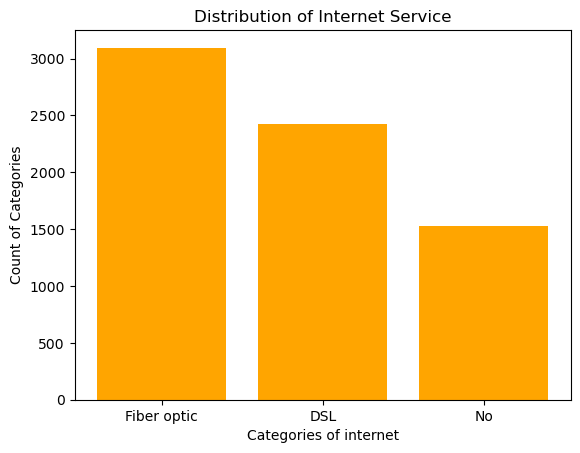

In [19]:
chart=plt.bar(data['InternetService'].value_counts().keys().tolist(), data['InternetService'].value_counts().tolist(), color = 'orange')
plt.xlabel('Categories of internet')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service')


In [20]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Text(0.5, 1.0, 'Distribution of tenure')

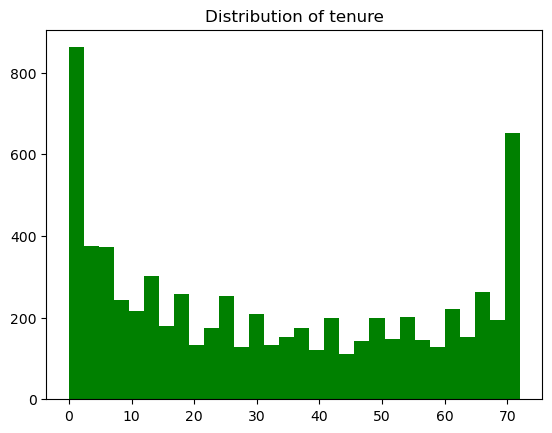

In [21]:
plt.hist(data['tenure'], bins = 30, color = 'green')
plt.title('Distribution of tenure')

Text(0.5, 1.0, 'Tenure vs Monthly Charges')

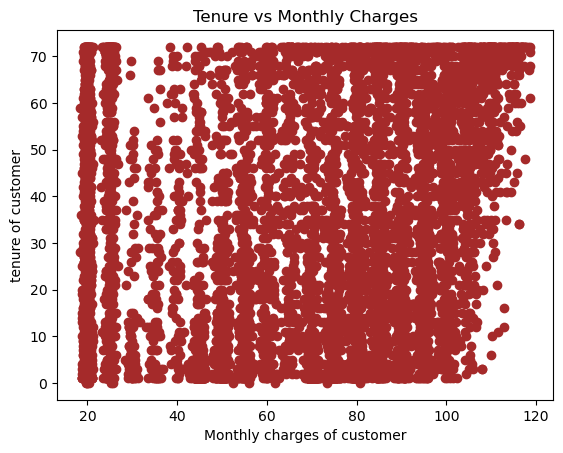

In [22]:
plt.scatter(x = data['MonthlyCharges'], y = data['tenure'], color = 'Brown')
plt.xlabel('Monthly charges of customer')
plt.ylabel('tenure of customer')
plt.title('Tenure vs Monthly Charges')

Text(0, 0.5, 'tenure')

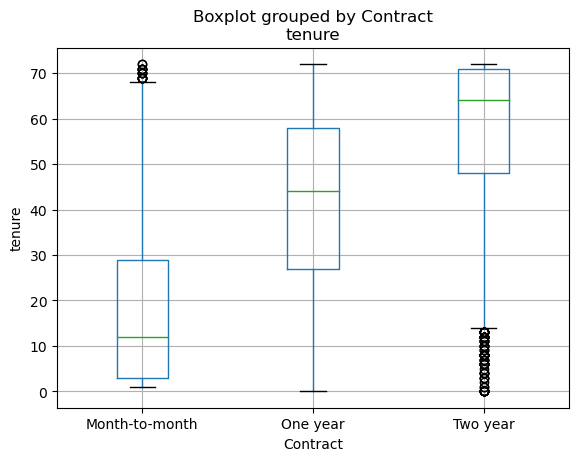

In [23]:
data.boxplot(by=['Contract'], column=['tenure'])
plt.xlabel('Contract')
plt.ylabel('tenure')

/Users/alkasingh/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


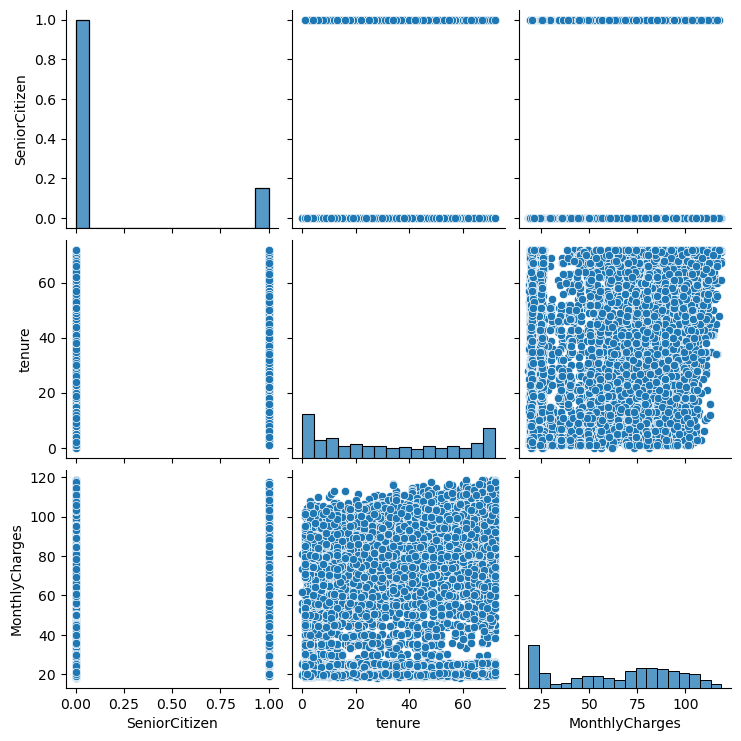

In [24]:
import seaborn as sns
sns.pairplot(data)

In [25]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
y = data[['MonthlyCharges']]
x = data[['tenure']]

In [26]:

y.head(),x.head()


(   MonthlyCharges
 0           29.85
 1           56.95
 2           53.85
 3           42.30
 4           70.70,
    tenure
 0       1
 1      34
 2       2
 3      45
 4       2)

In [27]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.30, random_state = 0)
# we r traing the model only on traing set and predicting the model only on test data

In [28]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4930, 1), (4930, 1), (2113, 1), (2113, 1))

In [29]:
regressor = LinearRegression()

regressor.fit(x_train, y_train)

LinearRegression()

In [30]:
y_pred = regressor.predict(x_test)
y_pred[:5], y_test[:5]

(array([[60.95089608],
        [72.98096699],
        [59.1903979 ],
        [55.66940154],
        [71.51388517]]),
       MonthlyCharges
 2200           58.20
 4627          116.60
 3225           71.95
 2828           20.45
 3768           77.75)

In [124]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

29.394584027273893

In [125]:
# single variable model

In [126]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [127]:
x = data[['MonthlyCharges']]
y = data[['Churn']]

In [128]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.35, random_state = 0)

In [129]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(x_train, y_train)

/Users/alkasingh/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [130]:
y_pred = log_model.predict(x_test)

In [131]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test,y_pred), accuracy_score(y_test,y_pred)

(array([[1815,    0],
        [ 651,    0]]),
 0.7360097323600974)

In [132]:
# Multivariable model

In [133]:
x = data[['MonthlyCharges','tenure']]
y = data[['Churn']]

In [134]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20, random_state = 0)

In [135]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(x_train, y_train)

/Users/alkasingh/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [136]:
y_pred = log_model.predict(x_test)

In [137]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test,y_pred), accuracy_score(y_test,y_pred)

(array([[934, 107],
        [212, 156]]),
 0.7735982966643009)

In [138]:
x=data[['tenure']]
y=data[['Churn']]

In [139]:
from sklearn.tree import DecisionTreeClassifier


In [140]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20, random_state = 0)

In [141]:
my_tree=DecisionTreeClassifier()
my_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [142]:
y_pred=my_tree.predict(x_test)

In [143]:
confusion_matrix(y_test,y_pred), accuracy_score(y_test,y_pred)

(array([[965,  76],
        [281,  87]]),
 0.7466288147622427)

# if dependent variable is continuous numerical value with single independent variable, Linear Regression
# if we have multiple categories, then random forest or decision tree
# in case of logistic regression, it comes to binary classifier,means if we have two levels of dependent variable
# random forest is always better than decision tree model because it is an ensemble model


In [146]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

/Users/alkasingh/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [147]:
rf.predict(x_test)

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [148]:
confusion_matrix(y_test,y_pred), accuracy_score(y_test,y_pred)

(array([[965,  76],
        [281,  87]]),
 0.7466288147622427)